# Advanced GIS Lab 1

### Import shapefiles and organize them inside a geopackage
---

In [17]:
import pathlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Establish working directory paths
PATH = pathlib.Path().resolve()
DATA_DIR = PATH / 'data'
OUTPUT = PATH / 'output'

In [19]:
#Select all shapefiles
gdf = {}
shp_files = DATA_DIR.glob('*.shp')
for file in shp_files:
    name = file.stem
    gdf[name] = gpd.read_file(file)
    print(name)

Freeways
States
Large_Cities


In [40]:
#Loop through shapefiles and import them into geopackage
for layer in enumerate(gdf):
    if layer[0] == 0:
        gdf[layer[1]].to_file(OUTPUT / 'States.gpkg', layer=layer[1])
    else:
        gdf[layer[1]].to_file(OUTPUT / 'States.gpkg', layer=layer[1], mode='a')

## Establish Variables for Mapping from Geopackage

In [121]:
STATES_GPKG = OUTPUT / 'States.gpkg'
states = gpd.read_file(STATES_GPKG, layer='States')
freeways = gpd.read_file(STATES_GPKG, layer='Freeways')
cities = gpd.read_file(STATES_GPKG, layer='Large_Cities')

#Filter states geodataframes to lower 48
states = states[~states['STATE_NAME'].isin(['Hawaii', 'Alaska'])]
freeways = freeways[~freeways['CLASS'].isin(['N'])]

#use states layer as filiter for freeways and cities extent
sel_fw = freeways.intersects(states.union_all())
sel_c = cities.intersects(states.union_all())
freeways = freeways[sel_fw]
cities = cities[sel_c]
cities.columns

Index(['ObjectID', 'NAME', 'CLASS', 'ST', 'STFIPS', 'PLACEFIP', 'CAPITAL',
       'AREALAND', 'AREAWATER', 'POP_CLASS', 'POP2000', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE', 'HISPANIC',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_21', 'AGE_22_29',
       'AGE_30_39', 'AGE_40_49', 'AGE_50_64', 'AGE_65_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC',
       'RENTER_OCC', 'geometry'],
      dtype='object')

## Create Map

/tmp/ipykernel_1043533/2103814387.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  base = states.plot(figsize=(20, 20), color='None', edgecolor='grey', column='STATE_NAME', zorder=1)


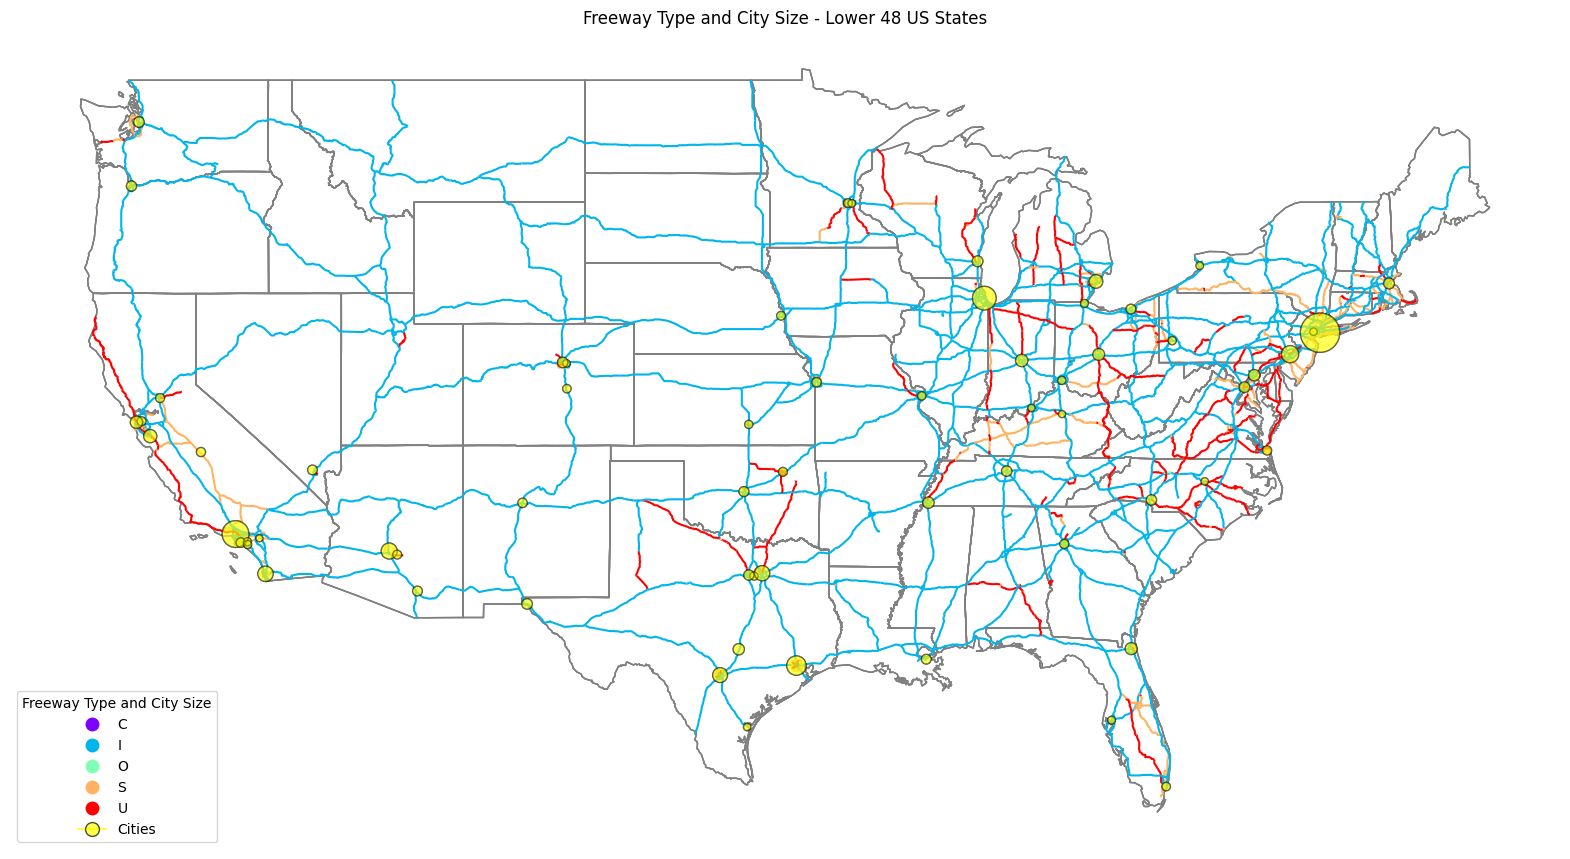

In [122]:
import matplotlib.lines as mlines
import numpy as np
base = states.plot(figsize=(20, 20), color='None', edgecolor='grey', column='STATE_NAME', zorder=1)

freeways_plot = freeways.plot(ax=base, column='CLASS', cmap='rainbow', zorder=2, legend=True)
cities.plot(ax=base, markersize=(cities['POP2000'] / 10000), color='yellow', edgecolor='black', alpha=0.3, zorder=3)

#Had to look up how to set legend for multiple layers...

# Get the freeway legend and remove it temporarily
freeway_legend = base.legend_
base.legend_ = None  # Remove from plot

# Create city handle
city_handle = mlines.Line2D([], [], color='yellow', marker='o', markersize=10, 
                           label='Cities', markeredgecolor='black', alpha=0.7)

# Combine freeway legend handles with city handle
if freeway_legend:
    all_handles = freeway_legend.legend_handles + [city_handle]
    all_labels = [t.get_text() for t in freeway_legend.get_texts()] + ['Cities']
    
    # Create new combined legend
    base.legend(handles=all_handles, labels=all_labels, loc='lower left', title='Freeway Type and City Size')
    
base.set_title("Freeway Type and City Size - Lower 48 US States")
base.set_axis_off()
plt.savefig(OUTPUT / 'States_Lab1.png', dpi=300)